In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers.core import Dense,Activation,Flatten
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing import image

In [2]:
#load data
(train_x, train_y), (test_x,test_y)= mnist.load_data()

#split the data
num_train = 2000
train_x = train_x[:num_train]
train_y = train_y[:num_train]

num_test = 2000
test_x = test_x[:num_test]
test_y = test_y[:num_test]

In [3]:
#convert input to one hot
np.set_printoptions(linewidth=200)
#print(np.array(train_x[0]))
x = np.array([[[1 if dd>0 else 0 for dd in m] for m in x] for x in train_x])
x_test = np.array([[[1 if dd>0 else 0 for dd in m] for m in x] for x in test_x])
#print(np.array(x[0]))

#convert target to one hot
#print(train_y[0])
y = tf.keras.utils.to_categorical(train_y)
y_test =  tf.keras.utils.to_categorical(train_y) 
#print(y[0])

In [4]:
 num_uotput = y.shape[1]

 #model
 model = Sequential()

 model.add(Dense(10,input_shape=(28,28)))
 model.add(Flatten())
 model.add(Activation('sigmoid'))
 model.add(Dense(num_uotput))
 model.add(Activation('sigmoid'))

 sgd= tf.keras.optimizers.SGD(learning_rate=0.1)
 model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
 history = model.fit(x,y, validation_data=(x_test,y_test), batch_size=1, epochs=10)

Epoch 1/10
2000/2000 [==============================] - 6s 3ms/step - loss: 0.2587 - accuracy: 0.4445 - val_loss: 0.4177 - val_accuracy: 0.0985
Epoch 2/10
2000/2000 [==============================] - 5s 3ms/step - loss: 0.1444 - accuracy: 0.7755 - val_loss: 0.5527 - val_accuracy: 0.0990
Epoch 3/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.1135 - accuracy: 0.8245 - val_loss: 0.6374 - val_accuracy: 0.1025
Epoch 4/10
2000/2000 [==============================] - 5s 3ms/step - loss: 0.0998 - accuracy: 0.8480 - val_loss: 0.6849 - val_accuracy: 0.1030
Epoch 5/10
2000/2000 [==============================] - 5s 3ms/step - loss: 0.0907 - accuracy: 0.8650 - val_loss: 0.7343 - val_accuracy: 0.0980
Epoch 6/10
2000/2000 [==============================] - 5s 3ms/step - loss: 0.0847 - accuracy: 0.8825 - val_loss: 0.7755 - val_accuracy: 0.0955
Epoch 7/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.0801 - accuracy: 0.8825 - val_loss: 0.7936 - val_accuracy:

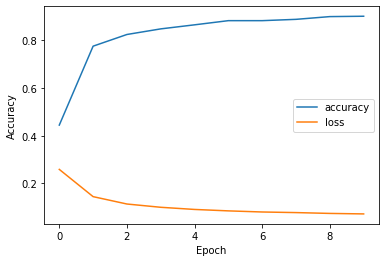

In [5]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label = 'loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [6]:
model.evaluate(x_test,y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.8545 - accuracy: 0.0985


[0.854457437992096, 0.09849999845027924]